In [23]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import binary_opening, binary_erosion, binary_propagation, measurements, generate_binary_structure, iterate_structure

from imageio import imread

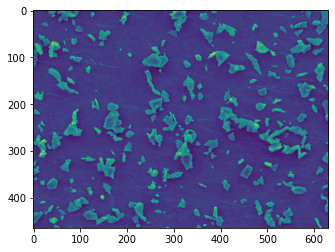

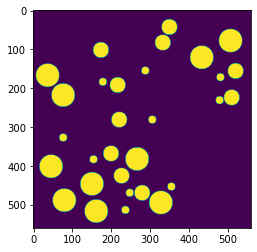

In [68]:
poudre = imread('poudre.bmp')
simulation = imread('simulation.bmp')

plt.figure()
plt.imshow(poudre)
plt.figure()
plt.imshow(simulation)

In [92]:
def disk(r):
    x = np.arange(-r, r+1, 1)
    xx, yy = np.meshgrid(x,x)
    d = np.sqrt(xx**2 + yy**2)
    return d<=r

In [93]:
def gen_images(image, n):
    A = measurements.sum(image)
    label, N = measurements.label(image)
    
    areas, numbers = np.zeros((n,), dtype=np.longdouble), np.zeros((n,), dtype=np.longdouble) 
    
    imgs = []
    se = generate_binary_structure(2,1)
    for i in range(0,n):
        n_se = iterate_structure(se, i-1)
        im = binary_erosion(image, structure=n_se)
        im = binary_propagation(im, mask=image)
        
        areas[i] = 255*100*(measurements.sum(im))/A
        label, n = measurements.label(im)
        numbers[i] = 100*n/N
    
    return areas, numbers

In [94]:
areas, numbers = gen_images(simulation, 35)

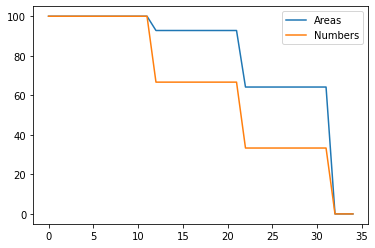

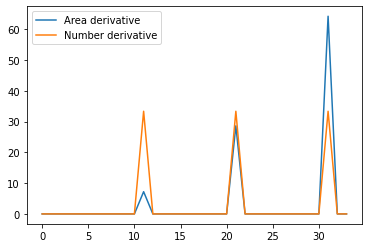

In [95]:
plt.figure()
plt.plot(areas, label='Areas')
#plt.figure()
plt.plot(numbers, label='Numbers')
plt.legend()
plt.show()


plt.figure()
plt.plot(-np.diff(areas), label='Area derivative')
plt.plot(-np.diff(numbers), label='Number derivative')
plt.legend()
plt.show()

<ipython-input-93-0c81e1b37e20>:14: RuntimeWarning: overflow encountered in long_scalars
  areas[i] = 255*100*(measurements.sum(im))/A


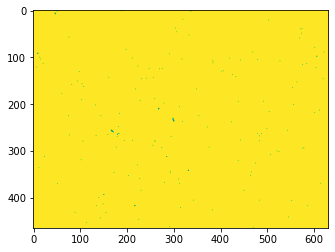

In [96]:
se = generate_binary_structure(2,1)
m = binary_opening(poudre)

bw = binary_propagation(m, mask=poudre)

plt.imshow(bw)

areas, numbers = gen_images(poudre, 30)


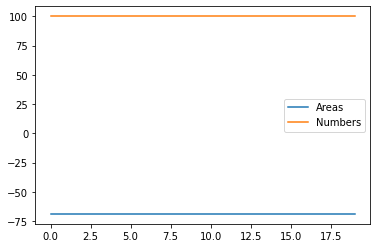

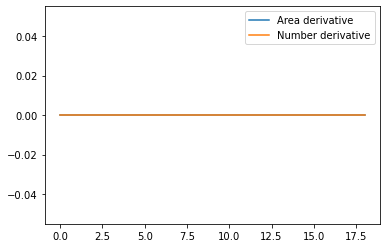

In [86]:
plt.figure()
plt.plot(areas, label='Areas')
#plt.figure()
plt.plot(numbers, label='Numbers')
plt.legend()
plt.show()


plt.figure()
plt.plot(-np.diff(areas), label='Area derivative')
plt.plot(-np.diff(numbers), label='Number derivative')
plt.legend()
plt.show()